# Atividade 01 - Parte 01 - Inventário de emissões utilizando Python

Aluna: Bruna Boscato Toscani

## Abrir planilha de fatores de emissões compiladas.
Utilizei o capítulo XX.X da AP42, pois meu empreendimento é uma XXX. (Colocar link)

In [11]:
# Utilizando Pandas para abrir a planilha
import pandas as np
import os

# Coletando o caminho da pasta que estou
cwd = os.getcwd()

# Pasta dos fatores de emissão
path = cwd+'\\tabelas\\FE'
print(path)

# Indicando nome do arquivo
chapterNumer = 11
subChapter = 7
file = 'chp_'+str(chapterNumer)+'_'+str(subChapter)+'.csv'
print(file)

# Abrindo arquivo utilizando o Pandas
fe = pd.read_csv(path+'\\'+file)
print(fe)

C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\FE
chp_11_7.csv


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\bruna\\OneDrive\\Documentos\\UFSC\\Controle de Poluicao Atmosferica\\ENS5173_20241\\tabelas\\FE\\chp_11_7.csv'

In [12]:
# Plotando os fatores de emissão
import matplotlib.pyplot as plt

atv = 1000 # Considerando uma taxa de atividade
emis = fe['PM']*atv

#Somando dataframe
print(emis.sum())

# Criando a figura com Matplotlib
# Subplots com número de linhas igual ao número de poluentes
# sharex significa compartilhar o eixo x
fig,ax = plt.subplots(len(fe.columns)-1,1,sharex = True,figsize=(9, 15))

# Loop para preencher o subplot com os gráficos de barra
for ii in range(1,len(fe.columns)):
    print(ii)
    ax[ii-1].bar(fe['Source'],fe.iloc[:,ii],color = ['#DAF7A6','red','cyan'])
    ax[ii-1].set_xlabel('Processo', fontsize=8)
    ax[ii-1].set_ylabel(fe.columns[ii]+'\n(g/kg)', fontsize=8) # Inventei a unidade

# Salva a figura na pasta figures - criar a pasta antes!!
fig.savefig(cwd+'\\figures\\barplot_fatorEmiss.png')

NameError: name 'fe' is not defined

## Criando taxa de atividade aleatória com sazonalidade

Nesta sessão nós criaremos uma taxa de atividade de um empreendimento qualquer que contenha sazonalidade ao longo dos meses do ano. Esta variabilidade também deve conter uma componente aleatória.

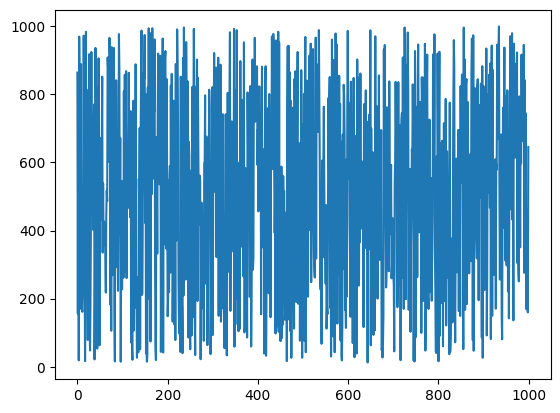

In [13]:
# Criando vetor de valores aleatórios
import numpy as np
atvMax = 1000 
atvMin = 12
n = 1000
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
#print(atv)

# Criando uma figura com os valores aleatórios
fig, ax= plt.subplots()
ax.plot(atv)

In [14]:
# Criar um vetor com as datas
from datetime import datetime, timedelta

# Definindo a data inicial e final
data_inicial = datetime(2024, 1, 1)
data_final = datetime(2024, 12, 31)

# Definindo o passo (intervalo entre as datas)
passo = timedelta(days=1)

# Criando o vetor de datas
vetor_datas = []
data_atual = data_inicial
while data_atual <= data_final:
    vetor_datas.append(data_atual)
    data_atual += passo

# Exibindo o vetor de datas
for data in vetor_datas:
    print(data)

2024-01-01 00:00:00
2024-01-02 00:00:00
2024-01-03 00:00:00
2024-01-04 00:00:00
2024-01-05 00:00:00
2024-01-06 00:00:00
2024-01-07 00:00:00
2024-01-08 00:00:00
2024-01-09 00:00:00
2024-01-10 00:00:00
2024-01-11 00:00:00
2024-01-12 00:00:00
2024-01-13 00:00:00
2024-01-14 00:00:00
2024-01-15 00:00:00
2024-01-16 00:00:00
2024-01-17 00:00:00
2024-01-18 00:00:00
2024-01-19 00:00:00
2024-01-20 00:00:00
2024-01-21 00:00:00
2024-01-22 00:00:00
2024-01-23 00:00:00
2024-01-24 00:00:00
2024-01-25 00:00:00
2024-01-26 00:00:00
2024-01-27 00:00:00
2024-01-28 00:00:00
2024-01-29 00:00:00
2024-01-30 00:00:00
2024-01-31 00:00:00
2024-02-01 00:00:00
2024-02-02 00:00:00
2024-02-03 00:00:00
2024-02-04 00:00:00
2024-02-05 00:00:00
2024-02-06 00:00:00
2024-02-07 00:00:00
2024-02-08 00:00:00
2024-02-09 00:00:00
2024-02-10 00:00:00
2024-02-11 00:00:00
2024-02-12 00:00:00
2024-02-13 00:00:00
2024-02-14 00:00:00
2024-02-15 00:00:00
2024-02-16 00:00:00
2024-02-17 00:00:00
2024-02-18 00:00:00
2024-02-19 00:00:00


In [15]:
# Criando vetor de datas
import pandas as pd

# Criar um intervalo de datas
datas = pd.date_range(start='2024-01-01', end='2024-12-31', freq='D')

# Criar um DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Mostrar o DataFrame resultante
print(df)

          Data  Mes
0   2024-01-01    1
1   2024-01-02    1
2   2024-01-03    1
3   2024-01-04    1
4   2024-01-05    1
..         ...  ...
361 2024-12-27   12
362 2024-12-28   12
363 2024-12-29   12
364 2024-12-30   12
365 2024-12-31   12

[366 rows x 2 columns]


In [16]:
# Ajustar meus números aleatórios com base no comprimento do vetor de datas
# Criando dataframe com datas e valores de atividade aleatória
import pandas as pd

# Extraindo o número de linhas/número de datas
n = df.shape[0]

# Criando atividade aleatória
atv = (atvMax - atvMin)*np.random.rand(n) + atvMin
df['atividade'] = atv

#print(atv)
print(df)
df.to_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\atv.csv")

# Criando uma figura com os valores aleatórios
#fig, ax= plt.subplots()
#ax.plot(datas, atv)

          Data  Mes   atividade
0   2024-01-01    1  765.478862
1   2024-01-02    1  336.870913
2   2024-01-03    1  613.691315
3   2024-01-04    1  753.496468
4   2024-01-05    1  658.187116
..         ...  ...         ...
361 2024-12-27   12  206.618101
362 2024-12-28   12  714.298164
363 2024-12-29   12  296.423462
364 2024-12-30   12  891.932122
365 2024-12-31   12  381.718212

[366 rows x 3 columns]


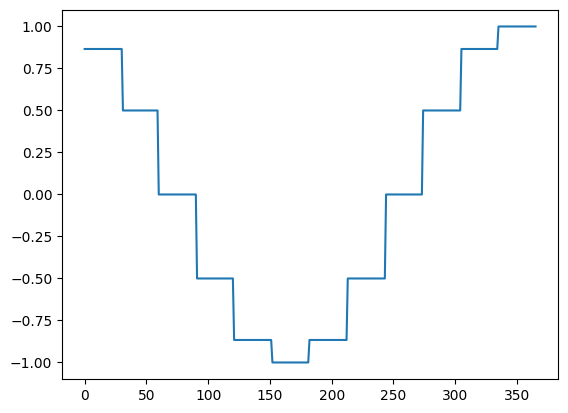

In [17]:
# Criando componente sazonal
sazonalidade = np.cos((2*np.pi)*df['Mes']/12)
plt.plot(sazonalidade)
df['sazonalidade'] = sazonalidade + 1
df.to_csv(r"C:\Users\bruna\OneDrive\Documentos\UFSC\Controle de Poluicao Atmosferica\ENS5173_20241\tabelas\atv.csv")

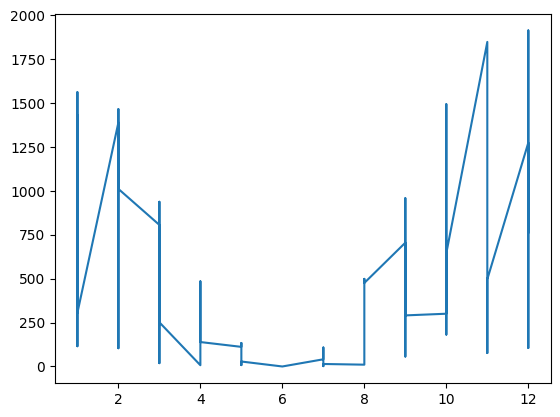

In [18]:
# Valores aleatórios com sazonalidade
df['aleatorioSazonal'] = df['atividade'] * df['sazonalidade'] 

plt.plot(df['Mes'], df['aleatorioSazonal'])